In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

trainData_df = pd.read_json('./train.json')
testData_df = pd.read_json('../test.json')
sample_df = pd.read_csv('../sample_submission.csv')


def  count_list_of_ingred(string):       
    all_ingred = []
    for (idx, row) in trainData_df.iterrows():
        if (row.loc['cuisine'] == string):
            for item in row.ingredients:
                all_ingred.append(item)
    return all_ingred

In [2]:
#getting the set of cuisines
trainData_df['cuisine']

#getting the set of cuisines
cuisine_set = set()
list_of_cuisines = []

for item in trainData_df['cuisine']:
    cuisine_set.add(item)
list_of_cuisines = list(cuisine_set)

In [3]:
from collections import Counter

# greek_ingrediants_list = count_list_of_ingred('italian')
# indian_ingredients_list = count_list_of_ingred('indian')
# filipino_ingredients_list = count_list_of_ingred('filipino')
# irish_ingredients_list = count_list_of_ingred('irish')
# vietnamese_ingredients_list = count_list_of_ingred('vietnamese')
# jamaican_ingredients_list = count_list_of_ingred('jamaican')
# mexican_ingredients_list =count_list_of_ingred('mexican')
# russian_ingredients_list = count_list_of_ingred('russian')
# spanish_ingredients_list = count_list_of_ingred('spanish')
# brazilian_ingredients_list =count_list_of_ingred('brazilian')
# british_ingredients_list =count_list_of_ingred('british')
# italian_ingredients_list = count_list_of_ingred('italian')
# thai_ingredients_list = count_list_of_ingred('thai')
# moroccan_ingredients_list = count_list_of_ingred('moroccan')
# korean_ingredients_list = count_list_of_ingred('korean')
# cajun_ingredients_list = count_list_of_ingred('cajun')
# french_ingredients_list = count_list_of_ingred('french')
southern_us_ingredients_list = count_list_of_ingred('southern_us')
# greek_ingredients_list = count_list_of_ingred('greek')
# japanese_ingredients_list = count_list_of_ingred('japanese')
# chinese_ingredients_list = count_list_of_ingred('chinese')


# c = Counter(greek_ingrediants_list)
# greek_ingred_counter_df = pd.DataFrame.from_dict(c, orient='index').reset_index()
# greek_ingred_counter_df = greek_ingred_counter_df.rename(columns={'index':'ingredients', 0:'count'})
# grouped_sort_max_first = greek_ingred_counter_df.sort_values(['count'], ascending=False)




c = Counter(southern_us_ingredients_list)
greek_ingred_counter_df = pd.DataFrame(list(c.items()), columns=['ingredients', 'count'])
# greek_ingred_counter_df = greek_ingred_counter_df.rename(columns={'index':'ingredients', 0:'count'})
grouped_sort_max_first = greek_ingred_counter_df.sort_values(['count'], ascending=False)

In [8]:
# italian_ingred = ['sausage links', 'fennel bulb', 'fronds', 'olive oil', 'cuban peppers', 'onions']

italian_ingred = ['baking powder', 'all-purpose flour', 'peach slices', 'corn starch', 'heavy cream', 'lemon juice', 'unsalted butter', 'salt', 'white sugar']

In [77]:
boolean_ingred_list = [0]* len(grouped_sort_max_first)

# grouped_sort_max_first
# italian_ingred
# for i , r in grouped_sort_max_first.iterrows():
#     for item in italian_ingred:
#         if item != r['ingredient']:
#             boolean_ingred_list.append(0)
#         else:ingredient
#             boolean_ingred_list.



for i, r in grouped_sort_max_first.iterrows():
    for item in italian_ingred:
        if item == r['ingredients']:
               boolean_ingred_list[i] = max_bar
        


In [78]:
len(grouped_sort_max_first)

2462

In [79]:
len(boolean_ingred_list)

2462

In [80]:
# for item in italian_ingred:
#     for i, r in grouped_sort_max_first.iterrows():
#         j = r['ingredients']
#         if item boolean_ingred_listis r['ingredients']:
#             boolean_ingred_list.append(1)
        
#         else:
#             boolean_ingred_list.append(0)
#         break
#             grouped_sort_max_first

In [81]:
for item in boolean_ingred_list:
    if item == max_bar:
        print(item)

2290
2290
2290
2290
2290
2290
2290
2290
2290


In [ ]:
features = []
counts=[]
for i, r in grouped_sort_max_first.iterrows():
    j = r['ingredients']
    c = r['count']
    features.append(j)
    counts.append(c)

max_bar = counts[0]



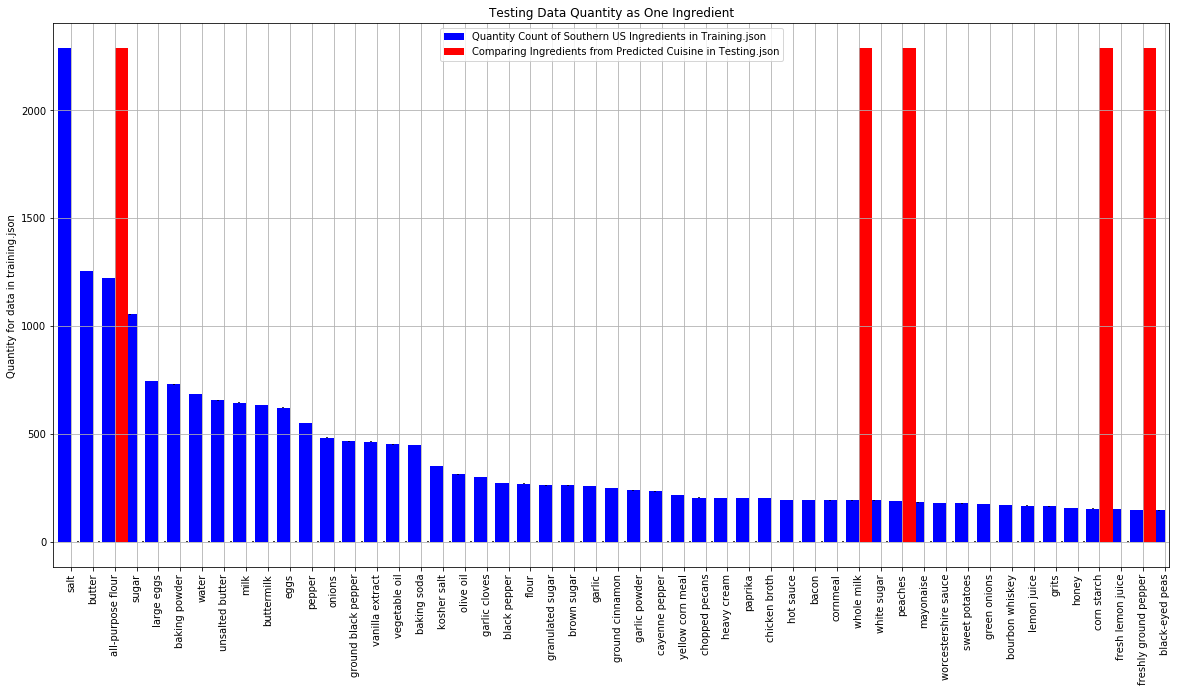

In [90]:
fig_size = plt.rcParams["figure.figsize"]
fig_size
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size


N = 51
men_means = tuple(counts[:N ])        
men_std = tuple([1] * N )

ind = np.arange(N)  # the x locations for the groups
width = 0.6      # the width of the bars


ax = grouped_sort_max_first.head(N ).plot.bar(grid=True)
rects1 =ax.bar(ind, men_means, width, color='b', yerr=men_std)

women_means = tuple(boolean_ingred_list[:N ])
women_std = tuple([1] * N )

rects2 = ax.bar(ind + width, women_means, width, color='R', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Quantity for data in training.json ')
ax.set_title('Testing Data Quantity as One Ingredient')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features)


ax.legend((rects1[0], rects2[0]), ('Quantity Count of Southern US Ingredients in Training.json', 'Comparing Ingredients from Predicted Cuisine in Testing.json'))


# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)


plt.show()

In [83]:
for item in testData_df.head(2)['ingredients']:
    print(item)

['sausage links', 'fennel bulb', 'fronds', 'olive oil', 'cuban peppers', 'onions']
['baking powder', 'all-purpose flour', 'peach slices', 'corn starch', 'heavy cream', 'lemon juice', 'unsalted butter', 'salt', 'white sugar']


In [49]:
series = pd.DataFrame()
for index, row in grouped_sort_max_first.iterrows():
    series['ingredients'] = row['ingredients']
    series['count'] = row['count']
    
    


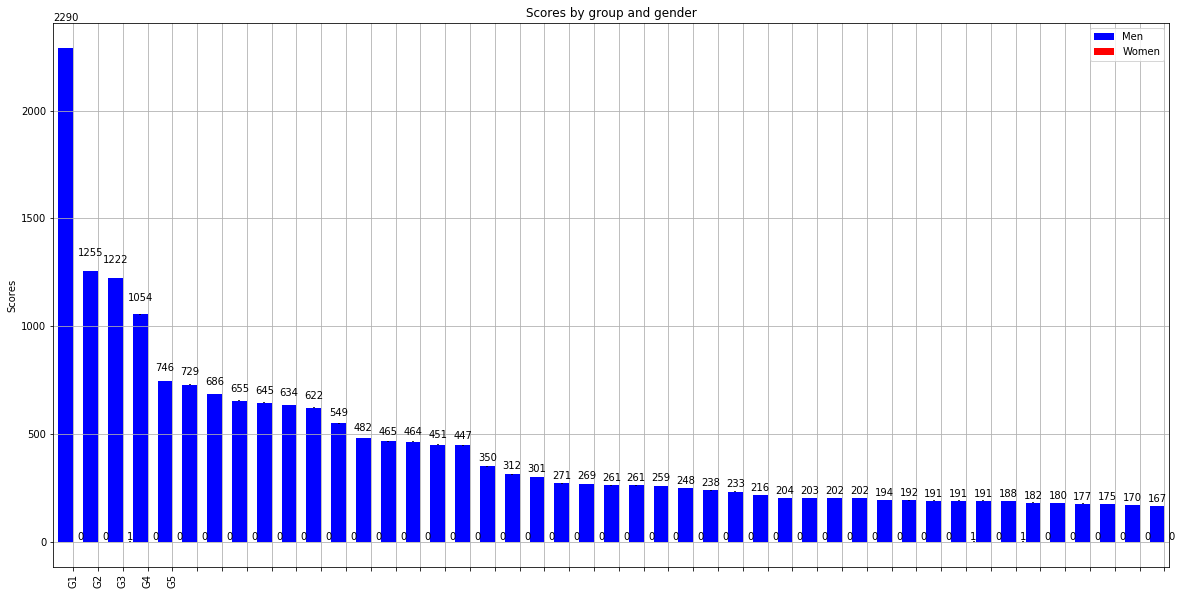

In [62]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from numpy import array
from sklearn.linear_model import LogisticRegression

cuisine_train_dataframe = pd.read_json('../35000.json')
cuisine_test_dataframe = pd.read_json('../test.json')

feature_cols = ['ingredients']

X = cuisine_train_dataframe[feature_cols]

Y = cuisine_test_dataframe[['ingredients']]

# converting array of strings for each json object to array of 1's and zeros by finding the number of unique strings 
#in all arrays in total
# and creating that many columns and looping through all strings in the arrays and finding their index and setting it to 1 

keys = set()

for ing_list in X['ingredients']:
    for ing in ing_list:
        keys.add(ing)

for ing_list in Y['ingredients']:
    for ing in ing_list:
        keys.add(ing)  
        
             
encoded = np.zeros(len(X) * len(keys)).reshape((len(X), len(keys)))
    
key_list = list(keys)

my_index = 0

for l in X['ingredients']:
    for item in l:
        index = key_list.index(item)
        encoded[my_index][index] = 1
    my_index += 1
    
X = np.array(encoded)

print("the 2nd json object has total ingredients: ")
np.count_nonzero(X[1] == 1)
# 11 columns are set to 1 
y = cuisine_train_dataframe['cuisine'] 

# encode the testing data to zeros and ones as well 

encoded2 = np.zeros(len(Y) * len(keys)).reshape((len(Y), len(keys)))
    
my_index2 = 0

for l in Y['ingredients']:
    for item in l:
        index = key_list.index(item)
        encoded2[my_index2][index] = 1
    my_index2 += 1
    

Y = np.array(encoded2)

logReg = LogisticRegression()
logReg.fit(X, y)

y_predict = logReg.predict(Y)

print(y_predict)

the 2nd json object has total ingredients: 
['italian' 'southern_us' 'chinese' ..., 'spanish' 'french' 'indian']


In [57]:
predicted_list = []
for item in y_predict:
    predicted_list.append(str(item))

In [ ]:
predicted_a = ['italian',
 'southern_us',
 'chinese',
 'mexican',
 'italian',
 'french',
 'mexican',
 'mexican',
 'indian',
 'italian',
 'thai',
 'mexican',
 'russian',
 'mexican',
 'italian',
 'russian',
 'italian',
 'chinese',
 'cajun_creole',
 'filipino',
 'thai',
 'italian',
 'thai',
 'indian',
 'italian',
 'korean',
 'greek',
 'indian',
 'italian',
 'moroccan',
 'french',
 'southern_us',
 'italian',
 'italian',
 'mexican',
 'southern_us',
 'italian',
 'chinese',
 'southern_us',
 'thai',
 'italian',
 'irish',
 'chinese',
 'cajun_creole',
 'italian',
 'italian',
 'japanese',
 'french',
 'indian',
 'southern_us',
 'french',
 'mexican',
 'italian',
 'mexican',
 'chinese',
 'indian',
 'mexican',
 'mexican',
 'mexican',
 'chinese',
 'southern_us',
 'brazilian',
 'indian',
 'brazilian',
 'mexican',
 'mexican',
 'italian',
 'southern_us',
 'french',
 'thai',
 'southern_us',
 'cajun_creole',
 'italian',
 'mexican',
 'southern_us',
 'mexican',
 'italian',
 'italian',
 'mexican',
 'british',
 'southern_us',
 'southern_us',
 'italian',
 'italian',
 'southern_us',
 'irish',
 'mexican',
 'chinese',
 'moroccan',
 'indian',
 'mexican',
 'mexican',
 'vietnamese',
 'moroccan',
 'korean',
 'jamaican',
 'italian',
 'japanese',
 'indian',
 'southern_us',
 'korean',
 'vietnamese',
 'italian',
 'mexican',
 'italian',
 'italian',
 'italian',
 'thai',
 'italian',
 'italian',
 'indian',
 'italian',
 'chinese',
 'indian',
 'southern_us',
 'indian',
 'moroccan',
 'french',
 'southern_us',
 'indian',
 'vietnamese',
 'greek',
 'southern_us',
 'korean',
 'chinese',
 'mexican',
 'southern_us',
 'italian',
 'mexican',
 'japanese',
 'indian',
 'southern_us',
 'filipino',
 'indian',
 'southern_us',
 'southern_us',
 'french',
 'greek',
 'mexican',
 'thai',
 'french',
 'chinese',
 'italian',
 'spanish',
 'mexican',
 'italian',
 'russian',
 'mexican',
 'southern_us',
 'italian',
 'thai',
 'cajun_creole',
 'italian',
 'southern_us',
 'mexican',
 'french',
 'italian',
 'mexican',
 'french',
 'french',
 'indian',
 'indian',
 'italian',
 'greek',
 'southern_us',
 'vietnamese',
 'italian',
 'mexican',
 'italian',
 'indian',
 'mexican',
 'italian',
 'filipino',
 'korean',
 'mexican',
 'spanish',
 'thai',
 'filipino',
 'french',
 'french',
 'southern_us',
 'southern_us',
 'italian',
 'thai',
 'southern_us',
 'cajun_creole',
 'greek',
 'mexican',
 'indian',
 'thai',
 'mexican',
 'southern_us',
 'french',
 'mexican',
 'korean',
 'chinese',
 'indian',
 'moroccan',
 'italian',
 'japanese',
 'chinese',
 'italian',
 'british',
 'jamaican',
 'southern_us',
 'southern_us',
 'cajun_creole',
 'cajun_creole',
 'mexican',
 'chinese',
 'vietnamese',
 'french',
 'italian',
 'indian',
 'italian',
 'southern_us',
 'italian',
 'chinese',
 'indian',
 'italian',
 'indian',
 'chinese',
 'indian',
 'italian',
 'mexican',
 'italian',
 'italian',
 'indian',
 'italian',
 'filipino',
 'italian',
 'mexican',
 'italian',
 'japanese',
 'mexican',
 'italian',
 'southern_us',
 'irish',
 'southern_us',
 'italian',
 'chinese',
 'italian',
 'italian',
 'jamaican',
 'southern_us',
 'italian',
 'italian',
 'korean',
 'mexican',
 'italian',
 'italian',
 'greek',
 'mexican',
 'japanese',
 'italian',
 'southern_us',
 'greek',
 'italian',
 'southern_us',
 'british',
 'southern_us',
 'japanese',
 'french',
 'russian',
 'southern_us',
 'italian',
 'italian',
 'mexican',
 'japanese',
 'russian',
 'italian',
 'italian',
 'chinese',
 'southern_us',
 'southern_us',
 'southern_us',
 'chinese',
 'cajun_creole',
 'italian',
 'spanish',
 'italian',
 'southern_us',
 'italian',
 'italian',
 'greek',
 'indian',
 'chinese',
 'indian',
 'japanese',
 'british',
 'japanese',
 'chinese',
 'french',
 'italian',
 'irish',
 'cajun_creole',
 'italian',
 'cajun_creole',
 'vietnamese',
 'mexican',
 'italian',
 'chinese',
 'french',
 'mexican',
 'indian',
 'chinese',
 'cajun_creole',
 'korean',
 'italian',
 'italian',
 'chinese',
 'chinese',
 'greek',
 'italian',
 'mexican',
 'southern_us',
 'mexican',
 'cajun_creole',
 'southern_us',
 'greek',
 'mexican',
 'irish',
 'italian',
 'southern_us',
 'mexican',
 'southern_us',
 'southern_us',
 'southern_us',
 'italian',
 'southern_us',
 'chinese',
 'mexican',
 'french',
 'indian',
 'southern_us',
 'indian',
 'mexican',
 'chinese',
 'indian',
 'filipino',
 'french',
 'moroccan',
 'mexican',
 'southern_us',
 'italian',
 'italian',
 'indian',
 'italian',
 'mexican',
 'mexican',
 'italian',
 'italian',
 'italian',
 'thai',
 'southern_us',
 'filipino',
 'italian',
 'italian',
 'italian',
 'southern_us',
 'southern_us',
 'french',
 'british',
 'italian',
 'french',
 'filipino',
 'indian',
 'southern_us',
 'mexican',
 'cajun_creole',
 'mexican',
 'italian',
 'thai',
 'italian',
 'filipino',
 'italian',
 'italian',
 'chinese',
 'cajun_creole',
 'indian',
 'mexican',
 'french',
 'indian',
 'thai',
 'spanish',
 'brazilian',
 'mexican',
 'moroccan',
 'mexican',
 'italian',
 'indian',
 'italian',
 'vietnamese',
 'mexican',
 'thai',
 'southern_us',
 'mexican',
 'mexican',
 'chinese',
 'southern_us',
 'southern_us',
 'chinese',
 'moroccan',
 'chinese',
 'chinese',
 'italian',
 'italian',
 'mexican',
 'chinese',
 'filipino',
 'italian',
 'italian',
 'southern_us',
 'chinese',
 'italian',
 'japanese',
 'chinese',
 'french',
 'french',
 'italian',
 'mexican',
 'southern_us',
 'french',
 'italian',
 'southern_us',
 'italian',
 'southern_us',
 'greek',
 'chinese',
 'chinese',
 'italian',
 'southern_us',
 'cajun_creole',
 'indian',
 'moroccan',
 'chinese',
 'italian',
 'thai',
 'korean',
 'japanese',
 'southern_us',
 'southern_us',
 'greek',
 'moroccan',
 'indian',
 'southern_us',
 'french',
 'greek',
 'southern_us',
 'vietnamese',
 'cajun_creole',
 'southern_us',
 'indian',
 'mexican',
 'french',
 'french',
 'japanese',
 'french',
 'thai',
 'chinese',
 'mexican',
 'southern_us',
 'italian',
 'mexican',
 'southern_us',
 'indian',
 'italian',
 'indian',
 'chinese',
 'mexican',
 'chinese',
 'indian',
 'chinese',
 'southern_us',
 'french',
 'mexican',
 'filipino',
 'southern_us',
 'cajun_creole',
 'cajun_creole',
 'southern_us',
 'indian',
 'italian',
 'french',
 'italian',
 'japanese',
 'moroccan',
 'italian',
 'thai',
 'indian',
 'mexican',
 'italian',
 'italian',
 'mexican',
 'cajun_creole',
 'spanish',
 'french',
 'southern_us',
 'italian',
 'chinese',
 'italian',
 'mexican',
 'mexican',
 'french',
 'french',
 'southern_us',
 'southern_us',
 'southern_us',
 'japanese',
 'french',
 'chinese',
 'italian',
 'mexican',
 'southern_us',
 'italian',
 'british',
 'italian',
 'mexican',
 'italian',
 'italian',
 'southern_us',
 'mexican',
 'mexican',
 'italian',
 'british',
 'japanese',
 'chinese',
 'moroccan',
 'vietnamese',
 'thai',
 'mexican',
 'mexican',
 'french',
 'italian',
 'chinese',
 'indian',
 'italian',
 'korean',
 'french',
 'italian',
 'southern_us',
 'indian',
 'italian',
 'moroccan',
 'french',
 'italian',
 'cajun_creole',
 'mexican',
 'italian',
 'italian',
 'jamaican',
 'southern_us',
 'greek',
 'southern_us',
 'italian',
 'irish',
 'chinese',
 'southern_us',
 'french',
 'moroccan',
 'southern_us',
 'mexican',
 'filipino',
 'mexican',
 'cajun_creole',
 'mexican',
 'french',
 'irish',
 'korean',
 'thai',
 'chinese',
 'thai',
 'french',
 'mexican',
 'mexican',
 'italian',
 'thai',
 'korean',
 'mexican',
 'southern_us',
 'filipino',
 'chinese',
 'italian',
 'indian',
 'italian',
 'spanish',
 'japanese',
 'southern_us',
 'french',
 'southern_us',
 'mexican',
 'irish',
 'indian',
 'italian',
 'italian',
 'korean',
 'french',
 'korean',
 'british',
 'french',
 'mexican',
 'italian',
 'chinese',
 'indian',
 'spanish',
 'italian',
 'mexican',
 'southern_us',
 'vietnamese',
 'mexican',
 'southern_us',
 'japanese',
 'italian',
 'indian',
 'french',
 'southern_us',
 'mexican',
 'greek',
 'thai',
 'irish',
 'french',
 'greek',
 'chinese',
 'italian',
 'italian',
 'mexican',
 'cajun_creole',
 'italian',
 'british',
 'spanish',
 'mexican',
 'greek',
 'mexican',
 'thai',
 'mexican',
 'thai',
 'korean',
 'indian',
 'indian',
 'southern_us',
 'chinese',
 'italian',
 'japanese',
 'mexican',
 'mexican',
 'indian',
 'italian',
 'mexican',
 'mexican',
 'moroccan',
 'thai',
 'greek',
 'italian',
 'italian',
 'spanish',
 'thai',
 'cajun_creole',
 'indian',
 'southern_us',
 'southern_us',
 'cajun_creole',
 'indian',
 'japanese',
 'mexican',
 'cajun_creole',
 'mexican',
 'mexican',
 'indian',
 'moroccan',
 'french',
 'french',
 'cajun_creole',
 'mexican',
 'indian',
 'italian',
 'french',
 'indian',
 'southern_us',
 'indian',
 'italian',
 'italian',
 'southern_us',
 'moroccan',
 'indian',
 'southern_us',
 'greek',
 'mexican',
 'mexican',
 'japanese',
 'british',
 'italian',
 'french',
 'chinese',
 'italian',
 'mexican',
 'southern_us',
 'italian',
 'french',
 'southern_us',
 'french',
 'moroccan',
 'southern_us',
 'mexican',
 'italian',
 'indian',
 'cajun_creole',
 'southern_us',
 'italian',
 'french',
 'mexican',
 'vietnamese',
 'mexican',
 'french',
 'italian',
 'indian',
 'mexican',
 'french',
 'mexican',
 'italian',
 'french',
 'indian',
 'chinese',
 'chinese',
 'mexican',
 'chinese',
 'southern_us',
 'mexican',
 'southern_us',
 'italian',
 'greek',
 'indian',
 'moroccan',
 'moroccan',
 'cajun_creole',
 'brazilian',
 'chinese',
 'italian',
 'chinese',
 'southern_us',
 'italian',
 'mexican',
 'indian',
 'indian',
 'chinese',
 'french',
 'greek',
 'italian',
 'british',
 'italian',
 'mexican',
 'mexican',
 'italian',
 'italian',
 'mexican',
 'french',
 'italian',
 'filipino',
 'chinese',
 'southern_us',
 'french',
 'mexican',
 'british',
 'italian',
 'cajun_creole',
 'greek',
 'mexican',
 'spanish',
 'chinese',
 'mexican',
 'italian',
 'italian',
 'greek',
 'mexican',
 'chinese',
 'italian',
 'italian',
 'italian',
 'mexican',
 'irish',
 'russian',
 'italian',
 'british',
 'mexican',
 'japanese',
 'spanish',
 'irish',
 'southern_us',
 'italian',
 'cajun_creole',
 'mexican',
 'moroccan',
 'indian',
 'italian',
 'southern_us',
 'mexican',
 'chinese',
 'italian',
 'greek',
 'italian',
 'vietnamese',
 'indian',
 'french',
 'italian',
 'cajun_creole',
 'thai',
 'italian',
 'korean',
 'chinese',
 'thai',
 'vietnamese',
 'japanese',
 'french',
 'italian',
 'french',
 'indian',
 'indian',
 'greek',
 'chinese',
 'italian',
 'mexican',
 'vietnamese',
 'italian',
 'vietnamese',
 'moroccan',
 'greek',
 'mexican',
 'irish',
 'vietnamese',
 'filipino',
 'mexican',
 'thai',
 'mexican',
 'mexican',
 'southern_us',
 'italian',
 'southern_us',
 'chinese',
 'cajun_creole',
 'mexican',
 'mexican',
 'italian',
 'italian',
 'italian',
 'mexican',
 'french',
 'italian',
 'italian',
 'thai',
 'spanish',
 'southern_us',
 'greek',
 'italian',
 'mexican',
 'southern_us',
 'mexican',
 'southern_us',
 'italian',
 'greek',
 'indian',
 'cajun_creole',
 'mexican',
 'french',
 'french',
 'mexican',
 'southern_us',
 'southern_us',
 'chinese',
 'british',
 'thai',
 'mexican',
 'italian',
 'chinese',
 'southern_us',
 'southern_us',
 'cajun_creole',
 'italian',
 'southern_us',
 'mexican',
 'italian',
 'indian',
 'mexican',
 'mexican',
 'mexican',
 'mexican',
 'chinese',
 'italian',
 'indian',
 'southern_us',
 'italian',
 'mexican',
 'moroccan',
 'mexican',
 'french',
 'mexican',
 'italian',
 'indian',
 'southern_us',
 'italian',
 'italian',
 'filipino',
 'southern_us',
 'cajun_creole',
 'filipino',
 'mexican',
 'french',
 'italian',
 'italian',
 'indian',
 'mexican',
 'spanish',
 'indian',
 'cajun_creole',
 'southern_us',
 'spanish',
 'southern_us',
 'mexican',
 'russian',
 'mexican',
 'southern_us',
 'indian',
 'italian',
 'chinese',
 'french',
 'mexican',
 'chinese',
 'southern_us',
 'greek',
 'italian',
 'thai',
 'southern_us',
 'greek',
 'southern_us',
 'thai',
 'italian',
 'italian',
 'southern_us',
 'southern_us',
 'japanese',
 'mexican',
 'indian',
 'cajun_creole',
 'southern_us',
 'cajun_creole',
 'korean',
 'italian',
 'italian',
 'filipino',
 'southern_us',
 'moroccan',
 'thai',
 'french',
 'cajun_creole',
 'greek',
 'mexican',
 'chinese',
 'moroccan',
 'mexican',
 'mexican',
 'french',
 'cajun_creole',
 'chinese',
 'italian',
 'cajun_creole',
 'mexican',
 'greek',
 'italian',
 'italian',
 'chinese',
 'mexican',
 'southern_us',
 'italian',
 'italian',
 'indian',
 'southern_us',
 'southern_us',
 'mexican',
 'mexican',
 'irish',
 'italian',
 'italian',
 'thai',
 'indian',
 'vietnamese',
 'french',
 'mexican',
 'southern_us',
 'italian',
 'thai',
 'cajun_creole',
 'southern_us',
 'southern_us',
 'italian',
 'cajun_creole',
 'indian',
 'southern_us',
 'spanish',
 'mexican',
 'southern_us',
 'italian',
 'spanish']